In [2]:
import numpy as np
from GaussJacobiQuadRule_V3 import Jacobi, DJacobi, GaussLobattoJacobiWeights, GaussJacobiWeights
import matplotlib.pyplot as plt
import py



ModuleNotFoundError: No module named 'py'

In [ ]:

#watch jacob code
#make it more clear

#init with the size of the rectangular mesh and the N of elem that you want
#you cant print the elem
#you can get the coord of the vertex that is bottom left
#given a np.matrix with points as rows of the ref element [-1,1]x[-1,1] you cant traslate the points in it 
#with integrate  given the weights as row np array and the points a as a matrix you eval the integral


class rectangular_mesh:
    def __init__(self,Nx,Ny,a,b,c,d):
        self.Nx=Nx
        self.Ny=Ny
        self.a=np.float64(a)
        self.b=np.float64(b)
        self.c=np.float64(c)
        self.d=np.float64(d)
        self.h_x=np.float64((self.b-self.a)/Nx)
        self.h_y=np.float64((self.d-self.c)/Ny)

    def print(self):
        for elem in range(0,(self.Nx)*(self.Ny)*2):

            self.print_single_elem(elem)
        

    def print_single_elem(self,elem):

            print("element number : ",elem)

            if elem%2==1:
                x,y=self.get_coordinate(elem-1)
                print("odd_triangle")
                print("top-right vertex : ",x+self.h_x,y+self.h_y)
                print("bottom-right vertex : ",x+self.h_x,y)
                print("top-left vertex : ",x,y+self.h_y)


            else:
                    x,y=self.get_coordinate(elem)
                    print("even_triangle")
                    print("bottom-left vertex : ",x,y)
                    print("top-left vertex : ",x,y+self.h_y)
                    print("top-right vertex : ",x+self.h_x,y+self.h_y)



    def get_coordinate(self,elem):
            q,r=divmod(elem, self.Nx) 
            x=np.float64(self.a+self.h_x*r)
            y=np.float64(self.c+self.h_y*q)
            return x,y
    

    
    def traslate_points(self,number_of_elem,input):

    
            
            x,y=self.get_coordinate(number_of_elem)
            

            input[:, 0] = input[:,0]*self.h_x/2.0  +  x + self.h_x/2.0
        
            input[:, 1] = input[:,1]*self.h_y/2.0  +  y + self.h_y/2.0
    
            return input

    def integrate(self,W,x_quad):
        integral=0.0
        for elem in range(0,self.Nx*self.Ny):
            points_=self.traslate_points(elem,x_quad)
            eval=compute_function_on_rows(points_)
            integral+=np.sum(eval*W)*self.h_x*self.h_y/4.0
        return integral



In [ ]:
def f(row):
    return np.cos(row[0]+row[1])

def compute_function_on_rows(matrix):
    result = np.apply_along_axis(f, axis=1, arr=matrix)
    return result

In [ ]:
t=rectangular_mesh(1,1,2,3,-1,1)

In [ ]:
t.print()

element number :  0
even_triangle
bottom-left vertex :  2.0 -1.0
top-left vertex :  2.0 1.0
top-right vertex :  3.0 1.0
element number :  1
odd_triangle
top-right vertex :  3.0 1.0
bottom-right vertex :  3.0 -1.0
top-left vertex :  2.0 1.0


In [ ]:
t.print()

element number :  0
even_triangle
bottom-left vertex :  2.0 -1.0
top-left vertex :  2.0 1.0
top-right vertex :  3.0 1.0
bottom-right vertex :  3.0 -1.0
element number :  1
odd_triangle
top-right vertex :  3.0 1.0
bottom-right vertex :  3.0 -1.0
top-left vertex :  2.0 1.0


In [ ]:
N=[3,4,8,16,32,64]

In [ ]:
[x_quad,w_quad] = GaussLobattoJacobiWeights(10, 0, 0)


w=np.asarray(w_quad)
w=np.expand_dims(w, axis=0)

M=w*np.transpose(w)
print(M)

v=M.flatten()
print(v)
print(np.shape(v))


points=[[x,y] for y in x_quad for x in x_quad]
points=np.array(points)

[[0.00049383 0.00296236 0.00499754 0.00648984 0.00727866 0.00727866
  0.00648984 0.00499754 0.00296236 0.00049383]
 [0.00296236 0.01777049 0.0299791  0.03893104 0.04366301 0.04366301
  0.03893104 0.0299791  0.01777049 0.00296236]
 [0.00499754 0.0299791  0.05057522 0.06567729 0.0736602  0.0736602
  0.06567729 0.05057522 0.0299791  0.00499754]
 [0.00648984 0.03893104 0.06567729 0.08528893 0.09565559 0.09565559
  0.08528893 0.06567729 0.03893104 0.00648984]
 [0.00727866 0.04366301 0.0736602  0.09565559 0.1072823  0.1072823
  0.09565559 0.0736602  0.04366301 0.00727866]
 [0.00727866 0.04366301 0.0736602  0.09565559 0.1072823  0.1072823
  0.09565559 0.0736602  0.04366301 0.00727866]
 [0.00648984 0.03893104 0.06567729 0.08528893 0.09565559 0.09565559
  0.08528893 0.06567729 0.03893104 0.00648984]
 [0.00499754 0.0299791  0.05057522 0.06567729 0.0736602  0.0736602
  0.06567729 0.05057522 0.0299791  0.00499754]
 [0.00296236 0.01777049 0.0299791  0.03893104 0.04366301 0.04366301
  0.03893104 0.0

In [ ]:
sol=-np.cos(4)+np.cos(3)+np.cos(2)-np.cos(1)
e=[]
for n in N:
    t=rectangular_mesh(n,n,2,3,-1,1)
    res=t.integrate(v,points)
    e.append(np.abs(res-sol))
N=np.asarray(N)

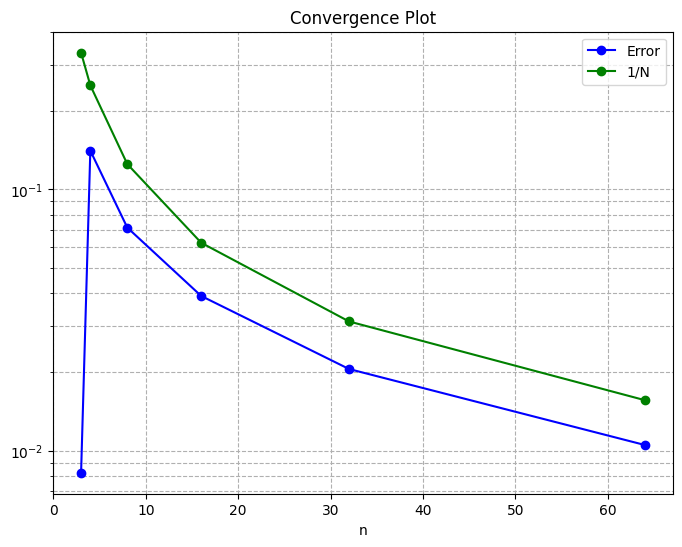

In [ ]:
plt.figure(figsize=(8, 6))
plt.semilogy(N, e, marker='o', linestyle='-', color='b', label='Error')
plt.semilogy(N,1/N, marker='o', linestyle='-', color='g', label='1/N')
plt.xlabel('n')
plt.title('Convergence Plot')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

In [ ]:
sol=-np.cos(4)+np.cos(3)+np.cos(2)-np.cos(1)
e=[]
for n in N:
    [x_quad,w_quad] = GaussLobattoJacobiWeights(n, 0, 0)


    w=np.asarray(w_quad)
    w=np.expand_dims(w, axis=0)

    M=w*np.transpose(w)

    v=M.flatten()



    points=[[x,y] for y in x_quad for x in x_quad]
    points=np.array(points)


    res=t.integrate(v,points)
    e.append(np.abs(res-sol))

N=np.asarray(N)

KeyboardInterrupt: 

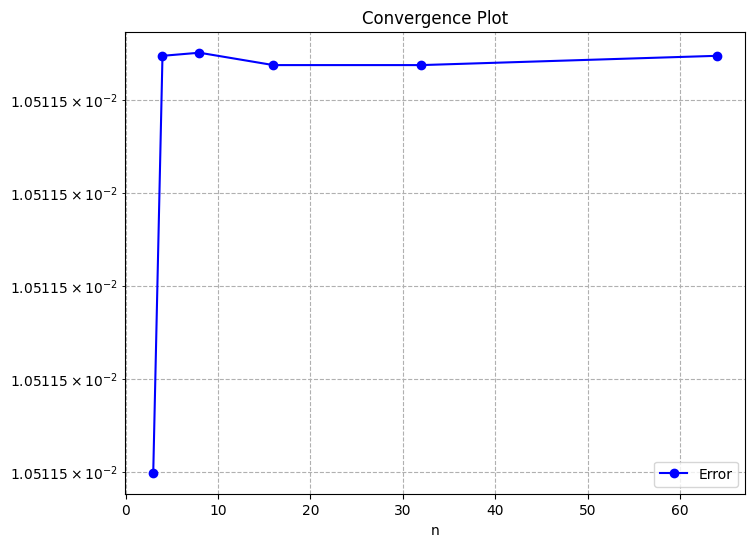

In [ ]:
plt.figure(figsize=(8, 6))
plt.semilogy(N, e, marker='o', linestyle='-', color='b', label='Error')
plt.xlabel('n')
plt.title('Convergence Plot')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

In [ ]:
print(res)

-1.3033094707023252


In [ ]:
L=[i for i in range(0,5)]
print(L)
import random
random.shuffle(L)
print(L)

[0, 1, 2, 3, 4]
[2, 0, 4, 3, 1]


In [ ]:
import numpy as np
from numpy.polynomial import legendre, chebyshev

# Degree of the quadrature rule
degree = 5

# Gauss-Legendre quadrature points and weights
legendre_points, legendre_weights = legendre.leggauss(degree)

# Chebyshev-Gauss quadrature points and weights (over the interval [-1, 1]),Chebyshev-Gauss quadrature an efficient method for numerical integration, especially for functions with singularities or rapidly oscillating behavior.
chebyshev_points, chebyshev_weights = chebyshev.chebgauss(degree)
chebyshev_points = chebyshev_points[::-1]



print("Gauss-Legendre Quadrature Points:", legendre_points)
print("Gauss-Legendre Quadrature Weights:", legendre_weights)
print()
print("Chebyshev-Gauss Quadrature Points:", chebyshev_points)
print("Chebyshev-Gauss Quadrature Weights:", chebyshev_weights)





Gauss-Legendre Quadrature Points: [-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
Gauss-Legendre Quadrature Weights: [0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]

Chebyshev-Gauss Quadrature Points: [-9.51056516e-01 -5.87785252e-01  6.12323400e-17  5.87785252e-01
  9.51056516e-01]
Chebyshev-Gauss Quadrature Weights: [0.62831853 0.62831853 0.62831853 0.62831853 0.62831853]


In [ ]:
w=np.expand_dims(legendre_weights, axis=0)

M=w*np.transpose(w)

v=M.flatten()
print(v)


points=[[x,y] for y in legendre_points for x in legendre_points]
points=np.array(points)
print(points)



[0.00444507 0.00996412 0.01460678 0.01795237 0.019703   0.019703
 0.01795237 0.01460678 0.00996412 0.00444507 0.00996412 0.02233571
 0.03274275 0.04024227 0.04416649 0.04416649 0.04024227 0.03274275
 0.02233571 0.00996412 0.01460678 0.03274275 0.04799883 0.05899267
 0.06474533 0.06474533 0.05899267 0.04799883 0.03274275 0.01460678
 0.01795237 0.04024227 0.05899267 0.07250457 0.07957484 0.07957484
 0.07250457 0.05899267 0.04024227 0.01795237 0.019703   0.04416649
 0.06474533 0.07957484 0.08733457 0.08733457 0.07957484 0.06474533
 0.04416649 0.019703   0.019703   0.04416649 0.06474533 0.07957484
 0.08733457 0.08733457 0.07957484 0.06474533 0.04416649 0.019703
 0.01795237 0.04024227 0.05899267 0.07250457 0.07957484 0.07957484
 0.07250457 0.05899267 0.04024227 0.01795237 0.01460678 0.03274275
 0.04799883 0.05899267 0.06474533 0.06474533 0.05899267 0.04799883
 0.03274275 0.01460678 0.00996412 0.02233571 0.03274275 0.04024227
 0.04416649 0.04416649 0.04024227 0.03274275 0.02233571 0.00996412

In [ ]:
sol=-np.cos(4)+np.cos(3)+np.cos(2)-np.cos(1)
e=[]
for n in N:
    t=rectangular_mesh(n,n,2,3,-1,1)
    res=t.integrate(v,points)
    e.append(np.abs(res-sol))
N=np.asarray(N)

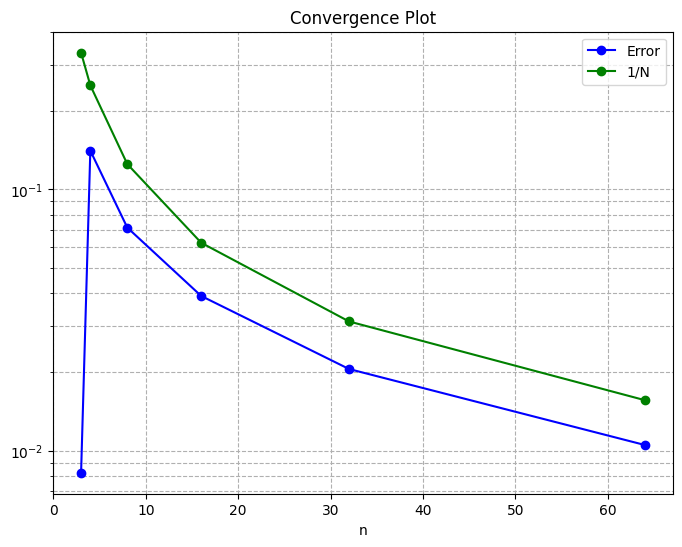

In [ ]:
plt.figure(figsize=(8, 6))
plt.semilogy(N, e, marker='o', linestyle='-', color='b', label='Error')
plt.semilogy(N,1/N, marker='o', linestyle='-', color='g', label='1/N')
plt.xlabel('n')
plt.title('Convergence Plot')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

In [ ]:
degree = 3

# Point at which to evaluate the Legendre polynomial and its derivative
x = [-1,1]  # You can change this to any value within the interval [-1, 1]

# Evaluate the Legendre polynomial of the given degree at the specified point
legendre_value = legendre.legval(x, [0] * (degree - 1) + [1])

# Evaluate the derivative of the Legendre polynomial of the given degree at the specified point
legendre_derivative = legendre.legval(x, [0] * (degree - 1) + [0, 1])

print(f"Legendre Polynomial of degree {degree} at x = {x}: {legendre_value}")
print(f"First Derivative of Legendre Polynomial of degree {degree} at x = {x}: {legendre_derivative}")


Legendre Polynomial of degree 3 at x = [-1, 1]: [1. 1.]
First Derivative of Legendre Polynomial of degree 3 at x = [-1, 1]: [-1.  1.]


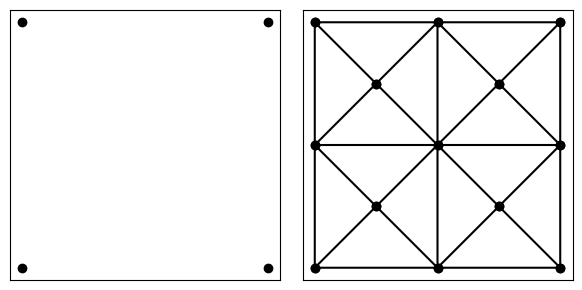

[[0.5  0.5 ]
 [0.75 0.25]
 [1.   0.5 ]]
[[0.25 0.25]
 [0.5  0.5 ]
 [0.   0.5 ]]
[[0.25 0.75]
 [0.5  1.  ]
 [0.   1.  ]]
[[0.   1.  ]
 [0.   0.5 ]
 [0.25 0.75]]
[[0.75 0.25]
 [0.5  0.5 ]
 [0.5  0.  ]]
[[0.5  0.5 ]
 [0.25 0.25]
 [0.5  0.  ]]
[[0.   0.  ]
 [0.5  0.  ]
 [0.25 0.25]]
[[0.75 0.75]
 [1.   1.  ]
 [0.5  1.  ]]
[[0.   0.5 ]
 [0.   0.  ]
 [0.25 0.25]]
[[1.   0.5 ]
 [1.   1.  ]
 [0.75 0.75]]
[[0.5  0.5 ]
 [0.5  1.  ]
 [0.25 0.75]]
[[0.   0.5 ]
 [0.5  0.5 ]
 [0.25 0.75]]
[[0.5  0.5 ]
 [1.   0.5 ]
 [0.75 0.75]]
[[0.5  1.  ]
 [0.5  0.5 ]
 [0.75 0.75]]
[[1.   0.  ]
 [1.   0.5 ]
 [0.75 0.25]]
[[0.5  0.  ]
 [1.   0.  ]
 [0.75 0.25]]


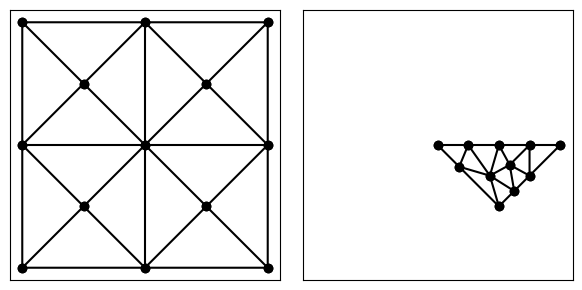

[[0.5  0.  ]
 [1.   0.  ]
 [0.75 0.25]]
[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]


In [19]:
import matplotlib.pyplot as plt
import numpy as np

import triangle as tr


list=[]

n=[]

A = dict(vertices=np.array(((0, 0), (1, 0), (1, 1), (0, 1))))
B = tr.triangulate(A, 'qa0.1')
tr.compare(plt, A, B)
plt.show()
for elem in range(0,len(B['triangles'])):

    v = B['vertices'][B['triangles'][elem]]
    v=np.array(v)
    print(v)

    #anticlockwise

    C=dict(vertices=v)
    D = tr.triangulate(C, 'qa0.01')

    n.append(len(D['triangles']))
    list.append(D)




tr.compare(plt,B,list[0])
plt.show()
print(v)
print(n)



In [13]:
# Calculate characteristic size of the mesh (length of longest edge among all triangles)
def max_length(B):
    vertices = B['vertices']
    triangles = B['triangles']
    characteristic_sizes = []

    for triangle_indices in triangles:
        triangle_vertices = vertices[triangle_indices]
        # Calculate distances between vertices
        side_lengths = [np.linalg.norm(triangle_vertices[i] - triangle_vertices[(i + 1) % 3]) for i in range(3)]
        # Characteristic size is the length of the longest edge
        characteristic_size = max(side_lengths)
        characteristic_sizes.append(characteristic_size)

    # Characteristic size of the mesh is the maximum size among all triangles
    mesh_characteristic_size = max(characteristic_sizes)
    return mesh_characteristic_size     

In [14]:
vertex=B['vertices'][B['triangles']][0]
print("H =",max_length(B))

h=-1.0
for elem in list:
    if h<max_length(elem):
        h=max_length(elem)

print("h =",h)

H = 0.5
h = 0.2285533905932738


In [7]:
def traslate_points(input,vert):
        
        output=np.zeros(shape=np.shape(input))
        
        output[:, 0] = input[:,0]*(vert[1,0]-vert[0,0])  +input[:,1]*(vert[2,0]-vert[0,0])     +   vert[0,0]
    
        output[:, 1] = input[:,0]*(vert[1,1]-vert[0,1])  +input[:,1]*(vert[2,1]-vert[0,1])     +   vert[0,1]


        det=(vert[1,0]-vert[0,0])*(vert[2,1]-vert[0,1])-(vert[2,0]-vert[0,0])*(vert[1,1]-vert[0,1])

        return output,det

In [ ]:
point=np.asarray([[0.0,1.0]])
print(traslate_points(point,vertex))

(array([[1. , 0.5]]), 0.125)


In [ ]:
import numpy as np
from scipy.special import roots_legendre

def gauss_legendre_quadrature(order):
    # Calculate Gauss-Legendre nodes and weights on the interval [-1, 1]
    nodes, weights = roots_legendre(order)
    
    # Map nodes and weights from [-1, 1] interval to [0, 1] interval for triangular domain
    nodes = 0.5 * (nodes + 1)
    weights = 0.5 * weights
    
    # Generate 2D quadrature points and weights for the reference triangle
    points = []
    weights_2d=[]

    for i in range(order):
        for j in range(order):
            if nodes[i]+nodes[j]<=1:
                points.append([nodes[i], nodes[j]])
                weights_2d.append(weights[i]*weights[j])
    
    return np.array(points),np.array(weights_2d)

# Example usage
order = 20  # Specify the desired order
points, weights = gauss_legendre_quadrature(order)

print("Gauss-Legendre Quadrature Points (Reference Triangle):")
print(points)
print("Gauss-Legendre Quadrature Weights (Reference Triangle):")
print(weights)




def f(x):
    return np.square(x[:,0]+x[:,1])


print(np.sum(f(points)*weights))



Gauss-Legendre Quadrature Points (Reference Triangle):
[[0.0034357  0.0034357 ]
 [0.0034357  0.01801404]
 [0.0034357  0.04388279]
 [0.0034357  0.08044151]
 [0.0034357  0.12683405]
 [0.0034357  0.18197316]
 [0.0034357  0.2445665 ]
 [0.0034357  0.31314696]
 [0.0034357  0.38610707]
 [0.0034357  0.46173674]
 [0.0034357  0.53826326]
 [0.0034357  0.61389293]
 [0.0034357  0.68685304]
 [0.0034357  0.7554335 ]
 [0.0034357  0.81802684]
 [0.0034357  0.87316595]
 [0.0034357  0.91955849]
 [0.0034357  0.95611721]
 [0.0034357  0.98198596]
 [0.0034357  0.9965643 ]
 [0.01801404 0.0034357 ]
 [0.01801404 0.01801404]
 [0.01801404 0.04388279]
 [0.01801404 0.08044151]
 [0.01801404 0.12683405]
 [0.01801404 0.18197316]
 [0.01801404 0.2445665 ]
 [0.01801404 0.31314696]
 [0.01801404 0.38610707]
 [0.01801404 0.46173674]
 [0.01801404 0.53826326]
 [0.01801404 0.61389293]
 [0.01801404 0.68685304]
 [0.01801404 0.7554335 ]
 [0.01801404 0.81802684]
 [0.01801404 0.87316595]
 [0.01801404 0.91955849]
 [0.01801404 0.95611

In [ ]:
integral=1/12
e=[]
n=[]
for order in range(10,101,10):  # Specify the desired order
            points, weights = gauss_legendre_quadrature(order)

            n.append(order)



            def f(x):
                return np.square(x[:,0])


            print(np.sum(f(points)*weights))
            e.append(np.abs(np.sum(f(points)*weights)-integral))
e=np.asarray(e)
n=np.asarray(n)


0.10228400961133359
0.09289432239682287
0.0897254483455369
0.08813398852668881
0.08717694095907504
0.08653802619650623
0.08608123368894466
0.08573841014601673
0.08547163526945097
0.08525813146559019


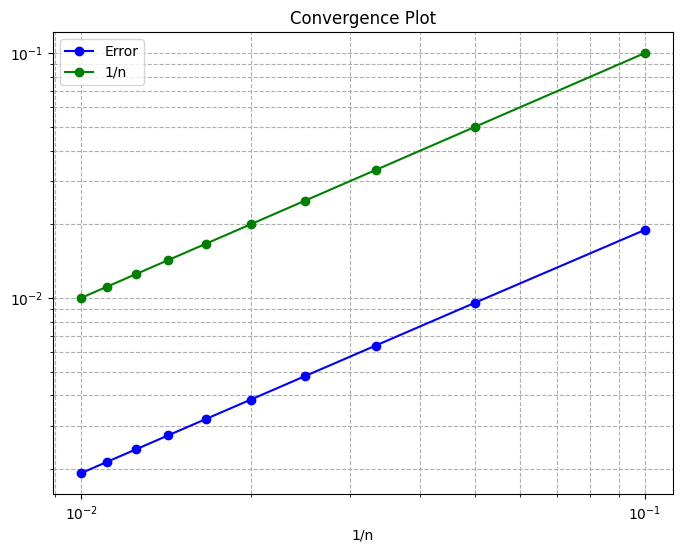

In [ ]:
plt.figure(figsize=(8, 6))
plt.loglog(1/n, e, marker='o', linestyle='-', color='b', label='Error')
plt.loglog(1/n, 1/n, marker='o', linestyle='-', color='g', label='1/n')

plt.xlabel('1/n')
plt.title('Convergence Plot')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

1.303796442938957 1.1666666666666667
1.2369719035915832 1.1666666666666667
1.2139315387230067 1.1666666666666667
1.2022640662616273 1.1666666666666667
1.1952161233102034 1.1666666666666667
1.1904976618508682 1.1666666666666667
1.187117603326235 1.1666666666666667
1.1845772341328267 1.1666666666666667
1.1825982338723153 1.1666666666666667
1.1810130436260642 1.1666666666666667
1.1797147536956831 1.1666666666666667
1.1786319404224466 1.1666666666666667
1.1777150711057098 1.1666666666666667
1.1769287141548304 1.1666666666666667
1.176246854603965 1.1666666666666667
1.1756499607280075 1.1666666666666667
1.1751230828793369 1.1666666666666667
1.174654584260844 1.1666666666666667
1.174235271439228 1.1666666666666667
1.1738577850444856 1.1666666666666667


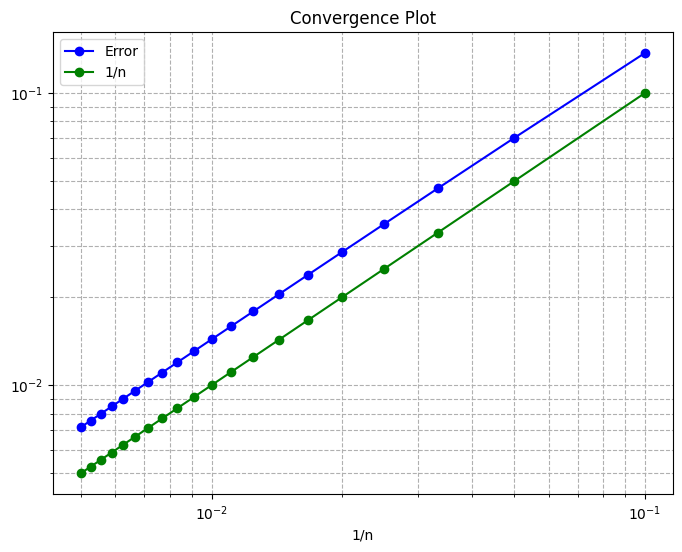

In [ ]:
e=[]
n=[]
for order in range(10,201,10):  # Specify the desired order
        points, weights = gauss_legendre_quadrature(order)

        n.append(order)      
        tot=0.0
        integral=7/6
        for triangle_ in list:
            for elem in range(len(triangle_['vertices'][triangle_['triangles']])):
                            
                vertex=triangle_['vertices'][triangle_['triangles'][elem]]
                output,det=traslate_points(points,vertex)
                tot+=np.sum(f(output)*weights*det)


        print(tot,integral)
        
        e.append(np.abs(tot-integral))
e=np.asarray(e)
n=np.asarray(n)


plt.figure(figsize=(8, 6))
plt.loglog(1/n, e, marker='o', linestyle='-', color='b', label='Error')
plt.loglog(1/n, 1/n, marker='o', linestyle='-', color='g', label='1/n')

plt.xlabel('1/n')
plt.title('Convergence Plot')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()
